In [1]:
# Developer Roles
# Education
# Demographics

# Top 5 Developer Types
# How many Developers are students?
# Gender Analysis: 
#     Countries with highest number of Female Developers
# Coding as Hobby
#Highest Degree done by Developers

In [241]:
# Dependencies
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pprint
import squarify
import requests
import json
import plotly.plotly as py
import gmaps
# Google API Key
from config import gkey

# Access maps with unique API key
gmaps.configure(api_key=gkey)

import gmaps.datasets

In [242]:
df = pd.read_csv("Resources/survey_results_public.csv", low_memory=False)
# df.columns
# df.head()

In [243]:
df_cleaned = df[['DevType','Hobby', 'OpenSource', 'Country', 'Student', 'Employment', 'FormalEducation',
                 'UndergradMajor','Exercise', 'Gender', 'SexualOrientation',
       'EducationParents', 'RaceEthnicity', 'Age','YearsCodingProf']]


In [ ]:
def google_api_request(url, params=None):
    params = params or {}
    params['key'] = gkey
    result = requests.get(url, params=params).json()
    if 'error_message' in result:
        raise Exception(result['error_message'])
    return result['results']

def geocode_results(address):
    return google_api_request('https://maps.googleapis.com/maps/api/geocode/json', params={
        'address': address,
    })


In [244]:
# Geography
# Map of developers from each country


In [310]:
df_developer_country = pd.DataFrame()
df_developer_country['Country'] = df_cleaned['Country'].value_counts().index
df_developer_country['Count'] = df_cleaned['Country'].value_counts().values
df_developer_country['Code'] = ""
df_developer_country = df_developer_country[df_developer_country.Country != 'Other Country (Not Listed Above)']
df_developer_country.dropna(how='all')
# df_developer_country

,Country,Count,Code
0,United States,20309,
1,India,13721,
2,Germany,6459,
3,United Kingdom,6221,
4,Canada,3393,
5,Russian Federation,2869,
6,France,2572,
7,Brazil,2505,
8,Poland,2122,
9,Australia,2018,


In [306]:
df_code = pd.read_csv('country_code.csv')
for index, row in df_developer_country.iterrows():
    country = row['Code']
    for index2, row2 in df_code.iterrows():
        if country == row2['2let']:
            gender_df_list.loc[index, "Code3"] = row2['3let']

In [294]:
 
# Loop through the cities_pd and run a lat/long search for each city
# for index, row in gender_df_list.iterrows():
#     country = row['Country'] 
#     results = geocode_results(f"{country}")
#     df_developer_country.loc[index, "Code"] = results[0]['address_components'][0]['short_name']



In [307]:
df_code = pd.read_csv('country_code.csv')
for index, row in df_developer_country.iterrows():
    country = row['Code']
    for index2, row2 in df_code.iterrows():
        if country == row2['2let']:
            df_developer_country.loc[index, "Code3"] = row2['3let']

In [308]:
df_developer_country['Count']


0      20309
1      13721
2       6459
3       6221
4       3393
5       2869
6       2572
7       2505
8       2122
9       2018
10      1841
11      1769
12      1535
13      1279
14      1164
15      1050
16      1037
17      1010
18      1004
19      1003
20       921
21       793
22       788
23       784
24       743
25       736
26       697
27       653
28       637
29       630
       ...  
153        4
154        3
155        3
156        3
157        3
158        3
159        2
160        2
161        2
162        2
163        2
164        2
165        2
166        2
167        2
168        2
169        1
170        1
171        1
172        1
173        1
174        1
175        1
176        1
177        1
178        1
179        1
180        1
181        1
182        1
Name: Count, Length: 182, dtype: int64

In [298]:
df = df_developer_country

data = [ dict(
        type = 'choropleth',
        locations = df['Code3'],
        z = df['Count'],
        text = df['Country'],
        colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            title = 'Number of Developers'),
      ) ]

layout = dict(
    title = 'Total Developers By Country',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        ),
        autosize=True
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='developers-world-map' )


In [249]:
dev_type = df_cleaned['DevType'].dropna()
dev_role = {}
for roles in dev_type:
    role_list= roles.split(';')
    for role in role_list:
        dev_role[role] = (dev_role.get(role, 0)+1) 


In [250]:
dev_role_df = pd.DataFrame.from_dict(dev_role, orient='index', columns=['Number of Developers'])
total_developers = dev_type.count()

dev_role_df['Percentage'] = round(dev_role_df['Number of Developers']/total_developers*100,2)
# dev_role_df['Number of Developers'].sort_values(ascending=False)

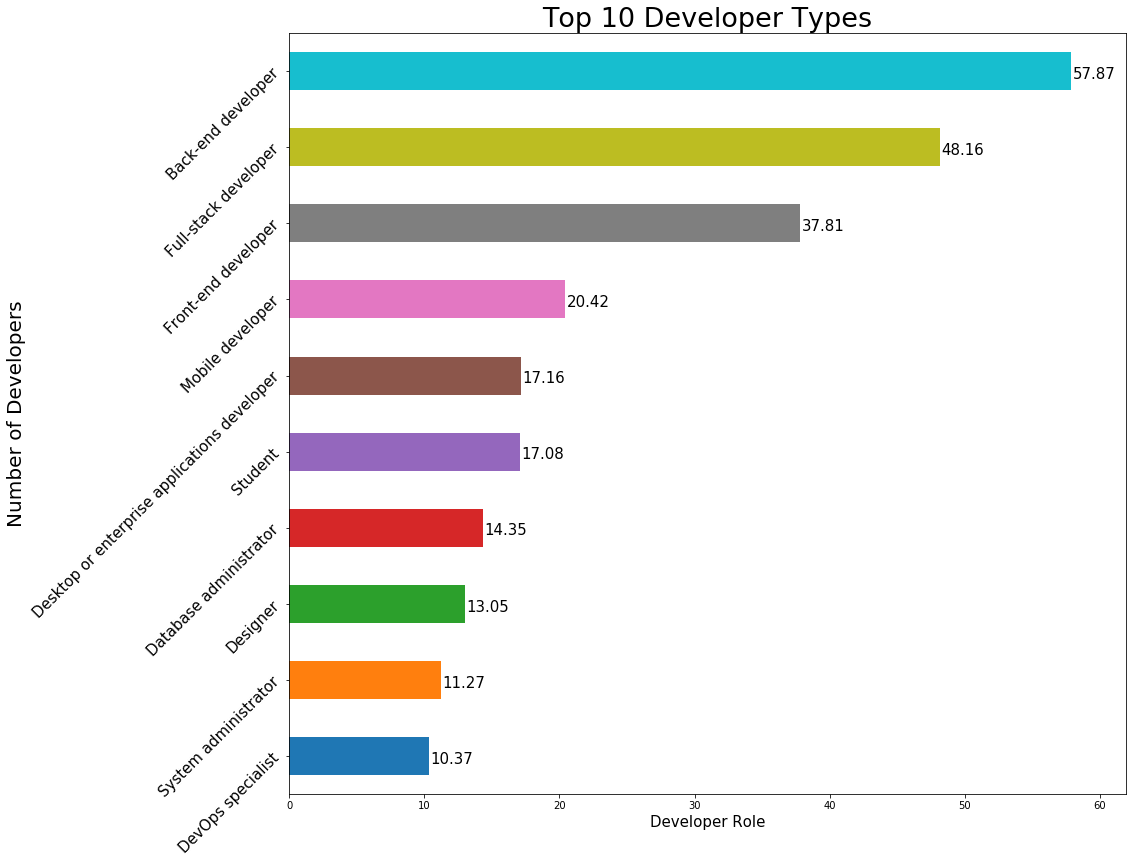

In [251]:

explode = (0.1,0,0,0,0)
plt.figure(figsize=(15,14))
plt.margins(.07,.07)
dev_list = dev_role_df['Percentage'].sort_values(ascending=False)
ax = dev_list[:10].sort_values(ascending=True).plot(kind='barh')
plt.title('Top 10 Developer Types',fontsize=27)
plt.xlabel('Developer Role',fontsize=15)
plt.yticks(fontsize=15, rotation=45)
plt.ylabel('Number of Developers',fontsize=20)

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.1, i.get_y()+.15, \
            str(round((i.get_width()), 2)), fontsize=15, color='black')

    
plt.savefig("Images/Top10DeveloperTypes.png")

In [252]:
Contributing to Open Source

SyntaxError: invalid syntax (<ipython-input-252-03e6c3c86940>, line 1)

In [ ]:
dev_stu = df_cleaned['Student'].dropna()
dev_student = {}
for role in dev_stu:
    dev_student[role] = (dev_student.get(role, 0)+1) 


In [ ]:
dev_student_df = pd.DataFrame.from_dict(dev_student, orient='index',columns=['Students'])
total_developers = dev_stu.count()
dev_student_df

dev_student_df['Students'] = round(dev_student_df['Students']/total_developers*100,2)
# dev_student_df

In [ ]:
# explode=(0.1,0,0)
dev_student_df['Students'].plot.pie()
plt.title('How many Developers are students?', fontsize=10)
plt.axis("equal")
plt.ylabel(" ")
# add a circle at the center
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.savefig("Images/StudentDevelopers.png")

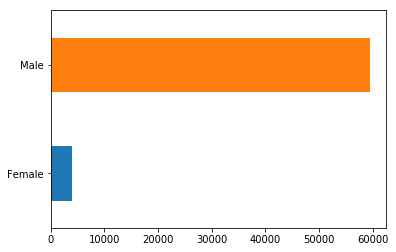

In [311]:
# Gender Analysis
male_female_df = gender_df['Gender'].where((gender_df['Gender'] == 'Male') | (gender_df['Gender'] == 'Female')).value_counts()
male_female_df.sort_values().plot(kind='barh')

In [ ]:
gender_df = df_cleaned[['Country','Gender']].dropna()
female_df = gender_df['Country'].loc[gender_df['Gender'] == 'Female'].value_counts()
male_df = gender_df['Country'].loc[gender_df['Gender'] == 'Male'].value_counts()
male_df = pd.DataFrame({'Country':male_df.index, 'count':male_df.values})
female_df = pd.DataFrame({'Country':female_df.index, 'count':female_df.values})
gender_count_df = female_df.merge(male_df, how='outer', on='Country', suffixes=['_female','_male'])
gender_count_df.head(10).plot(kind='bar', stacked=False)
plt.savefig("Images/DevelopersGenderAnalysisBarChart.png")

In [ ]:

gender_df_list = pd.DataFrame()
gender_df_list['Country'] = female_df['Country'].value_counts().index
# gender_df_list['Female Count'] = female_df['Country'].value_counts().values
# gender_df_list['Male Count'] = female_df['Country'].value_counts().values
gender_df_list['Lat'] = ""
gender_df_list['Lng'] = ""
gender_df_list['Code'] = ""
gender_df_list = gender_df_list[gender_df_list.Country != 'Other Country (Not Listed Above)']


In [256]:
def google_api_request(url, params=None):
    params = params or {}
    params['key'] = gkey
    result = requests.get(url, params=params).json()
    if 'error_message' in result:
        raise Exception(result['error_message'])
    return result['results']

def geocode_results(address):
    return google_api_request('https://maps.googleapis.com/maps/api/geocode/json', params={
        'address': address,
    })

def place_results(lat, lng, radius=8000, place_type=None, keyword=None, rankby=None):
    params = {
        'location': f"{lat},{lng}",
        'radius': radius,
    }
    if place_type:
        params['type'] = place_type
    if keyword:
        params['keyword'] = keyword
    if rankby:
        params['rankby'] = rankby
        del params['radius']
    return google_api_request('https://maps.googleapis.com/maps/api/place/nearbysearch/json', params)

In [271]:
# Loop through the cities_pd and run a lat/long search for each city
for index, row in gender_df_list.iterrows():
    country = row['Country']
    print(country)
    
    results = geocode_results(f"{country}")
    
    gender_df_list.loc[index, "Lat"] = results[0]["geometry"]["location"]["lat"]
    gender_df_list.loc[index, "Lng"] = results[0]["geometry"]["location"]["lng"]
    gender_df_list.loc[index, "Code"] = results[0]['address_components'][0]['short_name']
#     break
# Visualize to confirm lat lng appear
gender_df_list.head()


United States
India
United Kingdom
Canada
Germany
Russian Federation
Australia
France
Poland
Netherlands
Spain
Brazil
Romania
Israel
Ukraine
Argentina
Philippines
Pakistan
Sweden
Turkey
China
Malaysia
Iran, Islamic Republic of...
Ireland
Mexico
Austria
South Africa
Italy
Sri Lanka
Singapore
New Zealand
Finland
Switzerland
Norway
Nigeria
Denmark
Belgium
Egypt
Bulgaria
Japan
Serbia
Greece
Indonesia
Czech Republic
Belarus
Hong Kong (S.A.R.)
Bangladesh
Chile
Hungary
Colombia
Portugal
Taiwan
Morocco
Viet Nam
Tunisia
South Korea
Armenia
Saudi Arabia
Lebanon
Jordan
Uruguay
Thailand
Nepal
Kenya
Venezuela, Bolivarian Republic of...
Croatia
Myanmar
Latvia
Estonia
Peru
Albania
Lithuania
The former Yugoslav Republic of Macedonia
Slovenia
Ghana
Malta
Bosnia and Herzegovina
Algeria
Ethiopia
Slovakia
Paraguay
United Arab Emirates
Costa Rica
Republic of Korea
Republic of Moldova
Zimbabwe
El Salvador
Georgia
Luxembourg
Mauritius
Jamaica
Cuba
Guatemala
Iceland
Iraq
Bolivia
Andorra
Syrian Arab Republic
M

,Country,Lat,Lng,Code
0,United States,37.0902,-95.7129,US
1,India,20.5937,78.9629,IN
2,United Kingdom,55.3781,-3.43597,GB
3,Canada,56.1304,-106.347,CA
4,Germany,51.1657,10.4515,DE


In [282]:
df_code = pd.read_csv('country_code.csv')


In [285]:
df_code = pd.read_csv('country_code.csv')
for index, row in gender_df_list.iterrows():
    country = row['Code']
    for index2, row2 in df_code.iterrows():
        if country == row2['2let']:
            gender_df_list.loc[index, "Code3"] = row2['3let']
    

In [287]:
gender_df_list.dropna(how='any')

,Country,Lat,Lng,Code,Code3
0,United States,37.0902,-95.7129,US,USA
1,India,20.5937,78.9629,IN,IND
2,United Kingdom,55.3781,-3.43597,GB,GBR
3,Canada,56.1304,-106.347,CA,CAN
4,Germany,51.1657,10.4515,DE,DEU
5,Russian Federation,61.524,105.319,RU,RUS
6,Australia,-25.2744,133.775,AU,AUS
7,France,46.2276,2.21375,FR,FRA
8,Poland,51.9194,19.1451,PL,POL
9,Netherlands,52.1326,5.29127,NL,NLD


In [288]:

df = gender_df_list

data = [ dict(
        type = 'choropleth',
        locations = df['Code3'],
        z = df['Count'],
        text = df['Country'],
        colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            title = 'Number of Female Developers'),
      ) ]

layout = dict(
    title = 'Female Developers',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='female_developers-world-map' )

KeyError: 'Count'

In [20]:
# Coding as Hobby

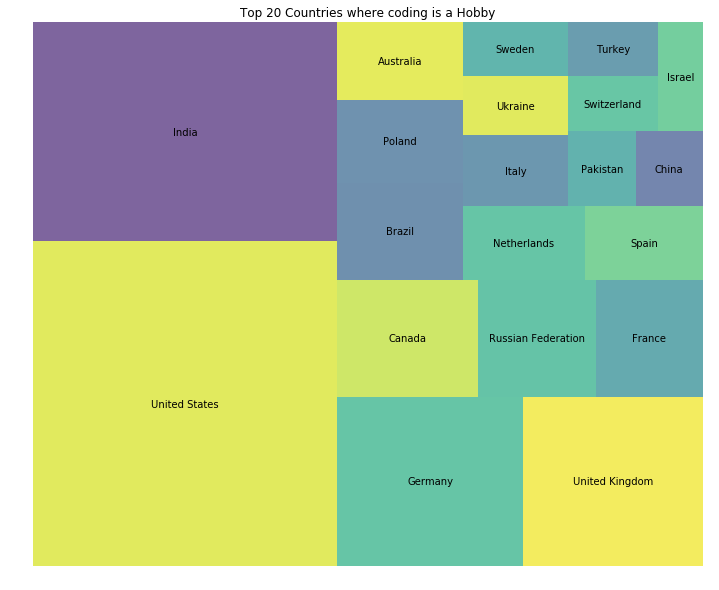

In [21]:
df_hobby = df_cleaned[['Country', 'Hobby']].dropna()
country = df_hobby['Country'].value_counts().index
value = df_hobby['Country'].value_counts().values



# print(country[:20])
plt.figure(figsize=(12,10))
# If you have 2 lists
squarify.plot(sizes=value[:20], label=country[:20], alpha=.7)
plt.axis('off')
plt.title('Top 20 Countries where coding is a Hobby')
plt.show()

In [22]:
#Highest Degree done by Developers


(-1.1117691655511515,
 1.1005604364548167,
 -1.109732241105186,
 1.1067785659712486)

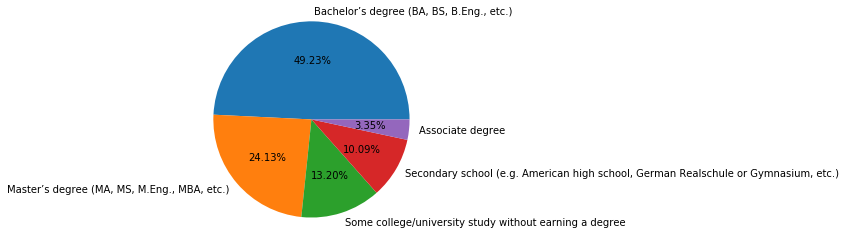

In [23]:
degree_df = df_cleaned['FormalEducation'].dropna()
degree = degree_df.value_counts().index
count = degree_df.value_counts().values
plt.pie(x = count[:5], 
        labels = degree[:5], 
        autopct = '%.2f%%')
plt.axis('equal')

In [24]:
# exp_dev_df = df_cleaned[['YearsCodingProf','DevType']].dropna(how='any')
# grouped = exp_dev_df.groupby(['YearsCodingProf'])
# # exp = exp_dev_df['YearsCodingProf'].head(10)
# # dev = exp_dev_df['DevType'].head(10)
# # # newdf = pd,DataFrame(exp, dev, index=exp)
# # exp_dev_df.sum()
# for name,group in grouped:
# #     print(name)
# #     print(group['DevType'])
#     for roles in group['DevType']:
#     role_list= roles.split(';')
#     for role in role_list:
#         dev_role[role] = (dev_role.get(role, 0)+1) 
# #     for 

In [25]:
#